# Datenanalyse

In diese Übung schauen wir uns an, wie man in Python Datensätze laden, manipulieren und visualisieren kann. Außerdem schauen wir uns an, wie man Features auf Datensätzen berechnet.


## Pandas

Ein weit verbreitetes Python-Paket für Datenmanagement und -analyse ist `pandas`. Die grundlegende Datenstruktur, die dieses Paket bereitstellt, ist das Data Frame. Ein Data Frame ist eine Tabelle, die im Prinzip so verwendet werden kann wie eine Tabelle in einer relationalen Datenbank, z.B. können Zeilen oder Spalten (oder beides) selektiert werden.

In [2]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt

data = arff.loadarff('S08.arff')
df = pd.DataFrame(data[0])


#plt.plot(df["Sensor_T8_Acceleration_X"])
df

,time,Sensor_T8_Acceleration_X,Sensor_T8_Acceleration_Y,Sensor_T8_Acceleration_Z,Sensor_T8_AngularVelocity_X,Sensor_T8_AngularVelocity_Y,Sensor_T8_AngularVelocity_Z,Sensor_RightForeArm_Acceleration_X,Sensor_RightForeArm_Acceleration_Y,Sensor_RightForeArm_Acceleration_Z,...,Sensor_RightLowerLeg_AngularVelocity_X,Sensor_RightLowerLeg_AngularVelocity_Y,Sensor_RightLowerLeg_AngularVelocity_Z,Sensor_LeftLowerLeg_Acceleration_X,Sensor_LeftLowerLeg_Acceleration_Y,Sensor_LeftLowerLeg_Acceleration_Z,Sensor_LeftLowerLeg_AngularVelocity_X,Sensor_LeftLowerLeg_AngularVelocity_Y,Sensor_LeftLowerLeg_AngularVelocity_Z,class
0,0.0,0.970733,-0.055330,0.171758,0.018513,0.028240,-0.000941,0.908353,-0.303781,0.181371,...,0.036398,0.001883,-0.002196,0.991241,-0.035035,0.161290,0.009413,-0.012865,0.022278,b'open'
1,8.0,0.970733,-0.055330,0.171972,0.031691,0.033888,-0.006589,0.908567,-0.303568,0.181158,...,0.026985,0.000000,-0.014434,0.991241,-0.035035,0.161290,0.016630,-0.007217,0.023533,b'open'
2,16.0,0.970519,-0.055330,0.172185,0.028553,0.034515,0.000941,0.908567,-0.303568,0.181158,...,0.031064,0.002196,-0.009099,0.991241,-0.035249,0.161077,0.030436,-0.006589,0.016630,b'open'
3,24.0,0.970519,-0.055116,0.172613,0.033574,0.030122,-0.001569,0.908567,-0.303568,0.181158,...,0.032005,0.009413,-0.007844,0.991241,-0.035463,0.161077,0.030122,0.003765,0.028553,b'open'
4,32.0,0.970519,-0.055116,0.172613,0.039849,0.008786,0.000941,0.908567,-0.303354,0.180944,...,0.026357,-0.003138,-0.011610,0.991241,-0.035676,0.161290,0.033574,0.002510,0.027298,b'open'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14636,117088.0,0.975860,-0.108737,0.116855,0.082209,-0.002196,-0.016003,0.259346,-0.521256,0.760949,...,0.074051,0.015689,0.042046,0.983123,0.002777,0.205298,0.036712,-0.059931,0.018513,b'close'
14637,117096.0,0.975860,-0.108524,0.116855,0.083464,0.004707,-0.011923,0.264046,-0.524247,0.757317,...,0.070913,0.015375,0.031691,0.983337,0.002564,0.204871,0.059931,-0.038281,0.023533,b'close'
14638,117104.0,0.975860,-0.108310,0.117069,0.109821,0.015061,-0.003138,0.268532,-0.527238,0.753685,...,0.074992,0.014120,0.039849,0.983337,0.002564,0.204657,0.060559,-0.035770,0.026043,b'close'
14639,117112.0,0.975860,-0.108310,0.117283,0.108880,0.021650,-0.010041,0.272805,-0.530442,0.749840,...,0.074678,0.015689,0.050204,0.983337,0.002350,0.204443,0.073110,-0.021337,0.030750,b'close'


### Zeilen und Spalten auswählen

Mit pandas können einfach bestimmte Zeilen und Spalten aus dem Data Frame ausgewählt werden. Eine Option besteht darin, Spalten über ihren Namen auszuwählen.


In [3]:
accx = df.loc[:,"Sensor_T8_Acceleration_X"]

In [4]:
accx

0        0.970733
1        0.970733
2        0.970519
3        0.970519
4        0.970519
           ...   
14636    0.975860
14637    0.975860
14638    0.975860
14639    0.975860
14640    0.975860
Name: Sensor_T8_Acceleration_X, Length: 14641, dtype: float64

Der `:` steht für "Wähle alle Zeilen". Wenn nur eine einzige Spalte gewählt wird, ist das Ergebnis vom Typ `Series`, ansonsten ist das Ergebnis wieder ein Data Frame. Spalten können auch über ihren Index ausgewählt werden:

In [5]:
acc = df.iloc[:,1:4]
acc

,Sensor_T8_Acceleration_X,Sensor_T8_Acceleration_Y,Sensor_T8_Acceleration_Z
0,0.970733,-0.055330,0.171758
1,0.970733,-0.055330,0.171972
2,0.970519,-0.055330,0.172185
3,0.970519,-0.055116,0.172613
4,0.970519,-0.055116,0.172613
...,...,...,...
14636,0.975860,-0.108737,0.116855
14637,0.975860,-0.108524,0.116855
14638,0.975860,-0.108310,0.117069
14639,0.975860,-0.108310,0.117283


Zeilen können auf die gleiche Art zugegrifen werden. Der folgende Ausdruck liefert beispielsweise die ersten 5 Zeilen:

In [9]:
df.iloc[0:5,:]

,time,Sensor_T8_Acceleration_X,Sensor_T8_Acceleration_Y,Sensor_T8_Acceleration_Z,Sensor_T8_AngularVelocity_X,Sensor_T8_AngularVelocity_Y,Sensor_T8_AngularVelocity_Z,Sensor_RightForeArm_Acceleration_X,Sensor_RightForeArm_Acceleration_Y,Sensor_RightForeArm_Acceleration_Z,...,Sensor_RightLowerLeg_AngularVelocity_X,Sensor_RightLowerLeg_AngularVelocity_Y,Sensor_RightLowerLeg_AngularVelocity_Z,Sensor_LeftLowerLeg_Acceleration_X,Sensor_LeftLowerLeg_Acceleration_Y,Sensor_LeftLowerLeg_Acceleration_Z,Sensor_LeftLowerLeg_AngularVelocity_X,Sensor_LeftLowerLeg_AngularVelocity_Y,Sensor_LeftLowerLeg_AngularVelocity_Z,class
0,0.0,0.970733,-0.055330,0.171758,0.018513,0.028240,-0.000941,0.908353,-0.303781,0.181371,...,0.036398,0.001883,-0.002196,0.991241,-0.035035,0.161290,0.009413,-0.012865,0.022278,b'open'
1,8.0,0.970733,-0.055330,0.171972,0.031691,0.033888,-0.006589,0.908567,-0.303568,0.181158,...,0.026985,0.000000,-0.014434,0.991241,-0.035035,0.161290,0.016630,-0.007217,0.023533,b'open'
2,16.0,0.970519,-0.055330,0.172185,0.028553,0.034515,0.000941,0.908567,-0.303568,0.181158,...,0.031064,0.002196,-0.009099,0.991241,-0.035249,0.161077,0.030436,-0.006589,0.016630,b'open'
3,24.0,0.970519,-0.055116,0.172613,0.033574,0.030122,-0.001569,0.908567,-0.303568,0.181158,...,0.032005,0.009413,-0.007844,0.991241,-0.035463,0.161077,0.030122,0.003765,0.028553,b'open'
4,32.0,0.970519,-0.055116,0.172613,0.039849,0.008786,0.000941,0.908567,-0.303354,0.180944,...,0.026357,-0.003138,-0.011610,0.991241,-0.035676,0.161290,0.033574,0.002510,0.027298,b'open'


Beide Möglichkeiten können auch kombiniert werden, z.B. so:

In [10]:
df.loc[0:5,["Sensor_T8_Acceleration_X", "Sensor_T8_Acceleration_Y"]]

,Sensor_T8_Acceleration_X,Sensor_T8_Acceleration_Y
0,0.970733,-0.055330
1,0.970733,-0.055330
2,0.970519,-0.055330
3,0.970519,-0.055116
4,0.970519,-0.055116
5,0.970519,-0.055116


Eine andere praktische Möglichkeit besteht darin, Zeilen oder Spalten über Bool'sche Ausdrücke auszuwählen. Der folgende Ausdruck liefert z.B. alle Zeilen, bei denen der Wert von  `Sensor_T8_Acceleration_X` kleiner als 0.7 ist.

In [11]:
df.loc[df.Sensor_T8_Acceleration_X < 0.7,:]

,time,Sensor_T8_Acceleration_X,Sensor_T8_Acceleration_Y,Sensor_T8_Acceleration_Z,Sensor_T8_AngularVelocity_X,Sensor_T8_AngularVelocity_Y,Sensor_T8_AngularVelocity_Z,Sensor_RightForeArm_Acceleration_X,Sensor_RightForeArm_Acceleration_Y,Sensor_RightForeArm_Acceleration_Z,...,Sensor_RightLowerLeg_AngularVelocity_X,Sensor_RightLowerLeg_AngularVelocity_Y,Sensor_RightLowerLeg_AngularVelocity_Z,Sensor_LeftLowerLeg_Acceleration_X,Sensor_LeftLowerLeg_Acceleration_Y,Sensor_LeftLowerLeg_Acceleration_Z,Sensor_LeftLowerLeg_AngularVelocity_X,Sensor_LeftLowerLeg_AngularVelocity_Y,Sensor_LeftLowerLeg_AngularVelocity_Z,class
4348,34784.0,0.697714,0.207221,0.661397,0.315657,0.969878,-0.560715,0.336894,-0.788507,0.397565,...,-0.190461,0.055852,0.443677,0.861141,0.515061,0.030335,-0.956072,-0.473172,-0.561657,b'close'
4349,34792.0,0.691733,0.211707,0.666097,0.299341,0.983997,-0.534045,0.352062,-0.775262,0.411237,...,-0.194540,0.063696,0.458739,0.859004,0.518693,0.030549,-0.714151,-0.468779,-0.552871,b'close'
4350,34800.0,0.685751,0.216193,0.670797,0.298086,0.962975,-0.510825,0.365307,-0.761803,0.425336,...,-0.215249,0.079699,0.468466,0.856655,0.522324,0.029908,-0.512708,-0.492626,-0.545340,b'close'
4351,34808.0,0.680197,0.220466,0.675283,0.302793,0.910260,-0.502981,0.377270,-0.748131,0.439863,...,-0.223094,0.079699,0.441481,0.854518,0.525956,0.028626,-0.316912,-0.465328,-0.514904,b'close'
4352,34816.0,0.674642,0.224525,0.679342,0.310009,0.848133,-0.504864,0.387310,-0.734672,0.454176,...,-0.241607,0.072796,0.430185,0.852596,0.529374,0.026490,-0.069344,-0.430813,-0.466269,b'close'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,36400.0,0.668233,0.262337,0.681478,-0.134296,-0.903671,0.832758,0.459090,-0.680624,0.502243,...,0.303420,-0.124569,-0.243489,0.906217,0.427900,-0.074129,-0.558519,-0.023219,-0.133040,b'close'
4551,36408.0,0.674642,0.256996,0.676992,-0.167556,-0.905868,0.843740,0.452467,-0.687460,0.499252,...,0.312520,-0.164732,-0.238469,0.906003,0.429395,-0.072634,-0.505805,-0.068403,-0.245058,b'close'
4552,36416.0,0.681051,0.251656,0.672506,-0.198306,-0.902102,0.863194,0.445204,-0.694723,0.495834,...,0.339504,-0.148729,-0.216505,0.905576,0.431532,-0.071780,-0.434578,-0.090995,-0.300910,b'close'
4553,36424.0,0.687460,0.245888,0.668020,-0.209602,-0.883590,0.890806,0.437941,-0.702200,0.491989,...,0.338249,-0.163477,-0.209915,0.904935,0.433668,-0.071139,-0.287418,-0.080954,-0.335425,b'close'


### Werte Einfügen

Das Einfügen von Werten in ein Data Frame funktioniert genau so. Der folgende Ausdruck setzt alle Werde der Spalte  `Sensor_T8_Acceleration_Y`, die kleiner als 0 sind, auf den Wert 0.

In [12]:
df.loc[df.Sensor_T8_Acceleration_Y < 0,"Sensor_T8_Acceleration_Y"] = 0
df

,time,Sensor_T8_Acceleration_X,Sensor_T8_Acceleration_Y,Sensor_T8_Acceleration_Z,Sensor_T8_AngularVelocity_X,Sensor_T8_AngularVelocity_Y,Sensor_T8_AngularVelocity_Z,Sensor_RightForeArm_Acceleration_X,Sensor_RightForeArm_Acceleration_Y,Sensor_RightForeArm_Acceleration_Z,...,Sensor_RightLowerLeg_AngularVelocity_X,Sensor_RightLowerLeg_AngularVelocity_Y,Sensor_RightLowerLeg_AngularVelocity_Z,Sensor_LeftLowerLeg_Acceleration_X,Sensor_LeftLowerLeg_Acceleration_Y,Sensor_LeftLowerLeg_Acceleration_Z,Sensor_LeftLowerLeg_AngularVelocity_X,Sensor_LeftLowerLeg_AngularVelocity_Y,Sensor_LeftLowerLeg_AngularVelocity_Z,class
0,0.0,0.970733,0.0,0.171758,0.018513,0.028240,-0.000941,0.908353,-0.303781,0.181371,...,0.036398,0.001883,-0.002196,0.991241,-0.035035,0.161290,0.009413,-0.012865,0.022278,b'open'
1,8.0,0.970733,0.0,0.171972,0.031691,0.033888,-0.006589,0.908567,-0.303568,0.181158,...,0.026985,0.000000,-0.014434,0.991241,-0.035035,0.161290,0.016630,-0.007217,0.023533,b'open'
2,16.0,0.970519,0.0,0.172185,0.028553,0.034515,0.000941,0.908567,-0.303568,0.181158,...,0.031064,0.002196,-0.009099,0.991241,-0.035249,0.161077,0.030436,-0.006589,0.016630,b'open'
3,24.0,0.970519,0.0,0.172613,0.033574,0.030122,-0.001569,0.908567,-0.303568,0.181158,...,0.032005,0.009413,-0.007844,0.991241,-0.035463,0.161077,0.030122,0.003765,0.028553,b'open'
4,32.0,0.970519,0.0,0.172613,0.039849,0.008786,0.000941,0.908567,-0.303354,0.180944,...,0.026357,-0.003138,-0.011610,0.991241,-0.035676,0.161290,0.033574,0.002510,0.027298,b'open'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14636,117088.0,0.975860,0.0,0.116855,0.082209,-0.002196,-0.016003,0.259346,-0.521256,0.760949,...,0.074051,0.015689,0.042046,0.983123,0.002777,0.205298,0.036712,-0.059931,0.018513,b'close'
14637,117096.0,0.975860,0.0,0.116855,0.083464,0.004707,-0.011923,0.264046,-0.524247,0.757317,...,0.070913,0.015375,0.031691,0.983337,0.002564,0.204871,0.059931,-0.038281,0.023533,b'close'
14638,117104.0,0.975860,0.0,0.117069,0.109821,0.015061,-0.003138,0.268532,-0.527238,0.753685,...,0.074992,0.014120,0.039849,0.983337,0.002564,0.204657,0.060559,-0.035770,0.026043,b'close'
14639,117112.0,0.975860,0.0,0.117283,0.108880,0.021650,-0.010041,0.272805,-0.530442,0.749840,...,0.074678,0.015689,0.050204,0.983337,0.002350,0.204443,0.073110,-0.021337,0.030750,b'close'


### Apply
In vielen Fällen wollen wir eine Funktion auf eine komplette Zeile oder Spalte der Daten anwenden. Die Funktion  `apply` erlaubt uns das. Der folgende Ausdruck berechnet die Mittelwerte pro Spalte:

In [13]:
df.iloc[:,1:31].apply(np.mean)

Sensor_T8_Acceleration_X                  0.967756
Sensor_T8_Acceleration_Y                  0.008310
Sensor_T8_Acceleration_Z                  0.137146
Sensor_T8_AngularVelocity_X               0.021981
Sensor_T8_AngularVelocity_Y               0.004654
Sensor_T8_AngularVelocity_Z               0.007052
Sensor_RightForeArm_Acceleration_X        0.207117
Sensor_RightForeArm_Acceleration_Y       -0.716522
Sensor_RightForeArm_Acceleration_Z        0.269941
Sensor_RightForeArm_AngularVelocity_X     0.031404
Sensor_RightForeArm_AngularVelocity_Y     0.004029
Sensor_RightForeArm_AngularVelocity_Z    -0.002067
Sensor_LeftForeArm_Acceleration_X         0.207117
Sensor_LeftForeArm_Acceleration_Y        -0.716522
Sensor_LeftForeArm_Acceleration_Z         0.269941
Sensor_LeftForeArm_AngularVelocity_X      0.031404
Sensor_LeftForeArm_AngularVelocity_Y      0.004029
Sensor_LeftForeArm_AngularVelocity_Z     -0.002067
Sensor_RightLowerLeg_Acceleration_X       0.975031
Sensor_RightLowerLeg_Accelerati

## Aufgabe 1

Berechnen Sie die Verteilung der Klassen in `df`.

In [10]:
hist=df.loc[:, 'class'].value_counts()

Plotten Sie die Verteilung der Klassen als Bar Plot. 

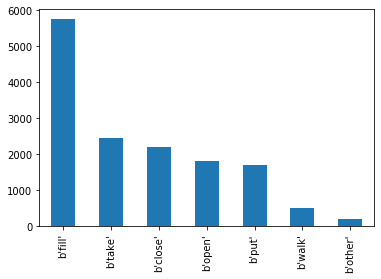

In [13]:
hist.plot(kind='bar')

Plotten Sie einige Accelerometer-Achsen (z.B. "Sensor_T8_Acceleration_X",
"Sensor_T8_Acceleration_Y", "Sensor_T8_Acceleration_Z") als Line Plot. Die verschiedenen Achsen sollen in verschiedenen Farben darstellt werden.

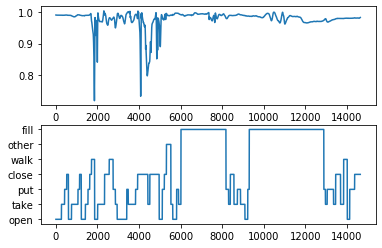

In [15]:
dfs = df.loc[:,["Sensor_LeftLowerLeg_Acceleration_X"]]
#dfs = df.loc[:,["Sensor_RightForeArm_Acceleration_X", "Sensor_RightForeArm_Acceleration_Y", "Sensor_RightForeArm_Acceleration_Z"]]

plt.subplot(2,1,1)
plt.plot(dfs)
plt.subplot(2, 1, 2)
plt.plot(df.loc[:,"class"])

## Aufgabe 2

Als nächstes wollen wir einige Features auf den Daten berechnen. Für sequentielle Daten werden Features typischerweise Segment-basiert berechnet. Das bedeutet, wir berechnen zunächst eine Feature-Funktion (Mittelwert, ...) für die Zeilen 1 bis n, dann für n+1 bis 2n, usw. Die Segmente können sich auch überlappen. 

Implementieren Sie die Funktion `feature`, die eine gegebene statistische Feature-Funktion (mean, ...) für eine gegebene Fenstergröße, Überlappung und einen gegebenen Datensatz berechnet. Berechnen Sie dann Mittelwert, Median und Varianz der Accelerometerdaten des rechten Fußes mit Segmentlängen von 128, 256 und 512. Benutzen Sie 50% Überlappung und plotten Sie das Ergebnis.



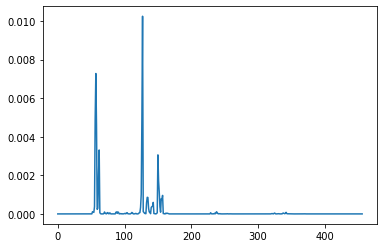

In [9]:
import matplotlib.pyplot as plt

def feature(wsize,overlap,data,ffunct):
    start = 0
    numwindows = int(len(data)/(wsize-overlap))
    result = np.zeros(numwindows)
    for i in range(numwindows):
        end = start + wsize-1
        windowed = data[start:end]
        result[i] = ffunct(windowed)
        start = start + wsize - overlap
    return(result)

meanX = feature(64,32,df.loc[:,"Sensor_LeftLowerLeg_Acceleration_X"].values,np.var)
plt.plot(meanX)

Mit Pandas lässt sich die Funktion auch eleganter hinschreiben:

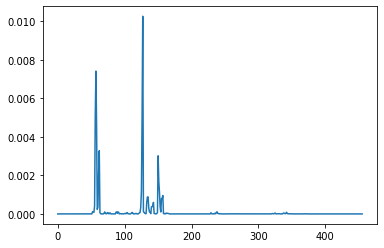

In [12]:
def feature(window_size, overlap,  data,ffun):
    '''Calculates a rolling window for the variance of a given data frame. The Resulting dataframe is then filtered by the specified overlap'''
    full_frame = data.rolling(window_size).var(ddof=0)
    return full_frame[window_size-1::overlap]

meanX = feature(64,32,df.loc[:,"Sensor_LeftLowerLeg_Acceleration_X"],np.mean)
plt.plot(meanX.values)